# Objectives
Exploring satellite imagery using Earthpy package

In [31]:
!pip install earthpy

In [32]:
import earthpy as ep
import earthpy.spatial as es
import earthpy.plot as epp

In [34]:
# Checking the avaialble dataset from ep
ep.data

Available Datasets: ['california-rim-fire', 'co-flood-extras', 'cold-springs-fire', 'cold-springs-landsat-scenes', 'cold-springs-modis-h4', 'colorado-flood', 'cs-test-landsat', 'cs-test-naip', 'naip-fire-crop', 'ndvi-automation', 'spatial-vector-lidar', 'twitter-flood', 'vignette-elevation', 'vignette-landsat']

In [36]:
# Downloading vignette-landsat dataset
ep.data.path = "."
ep.data.get_data("vignette-landsat")

'./vignette-landsat/.'

In [37]:
import glob as gb
landsat_paths = gb.glob("vignette-landsat/*band*.tif")
landsat_paths

['vignette-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band2_crop.tif',
 'vignette-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band1_crop.tif',
 'vignette-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band4_crop.tif',
 'vignette-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band5_crop.tif',
 'vignette-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band3_crop.tif',
 'vignette-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band7_crop.tif',
 'vignette-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band6_crop.tif']

In [38]:
landsat_paths.sort()
landsat_paths

['vignette-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band1_crop.tif',
 'vignette-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band2_crop.tif',
 'vignette-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band3_crop.tif',
 'vignette-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band4_crop.tif',
 'vignette-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band5_crop.tif',
 'vignette-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band6_crop.tif',
 'vignette-landsat/LC08_L1TP_034032_20160621_20170221_01_T1_sr_band7_crop.tif']

### Plotting RGB composite image


In [39]:
import earthpy.spatial as es
arr_st, meta=es.stack(landsat_paths)
arr_st

array([[[  493,   580,   714, ...,   842,   785,   723],
        [  498,   562,   682, ...,   851,   804,   725],
        [  492,   539,   633, ...,   870,   818,   730],
        ...,
        [  400,   398,   400, ..., -9999, -9999, -9999],
        [  432,   389,   402, ..., -9999, -9999, -9999],
        [  450,   394,   490, ..., -9999, -9999, -9999]],

       [[  597,   710,   867, ...,   938,   899,   844],
        [  624,   699,   845, ...,   948,   915,   860],
        [  611,   646,   771, ...,   965,   939,   869],
        ...,
        [  553,   558,   556, ..., -9999, -9999, -9999],
        [  589,   547,   551, ..., -9999, -9999, -9999],
        [  624,   537,   676, ..., -9999, -9999, -9999]],

       [[  867,   987,  1180, ...,  1235,  1215,  1193],
        [  884,   966,  1127, ...,  1235,  1232,  1214],
        [  878,   913,  1046, ...,  1257,  1262,  1234],
        ...,
        [  878,   887,   878, ..., -9999, -9999, -9999],
        [  911,   867,   874, ..., -9999, -99

In [56]:
meta

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': -9999.0, 'width': 2158, 'height': 1941, 'count': 7, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 13N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-105],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32613"]]'), 'transform': Affine(30.0, 0.0, 449085.0,
       0.0, -30.0, 4434855.0), 'blockxsize': 2158, 'blockysize': 1, 'tiled': False, 'interleave': 'band'}

The area covered by your dataset can be estimated based on its size and pixel resolution:

Width: 2158 pixels
Height: 1941 pixels
Resolution: 30 meters per pixel

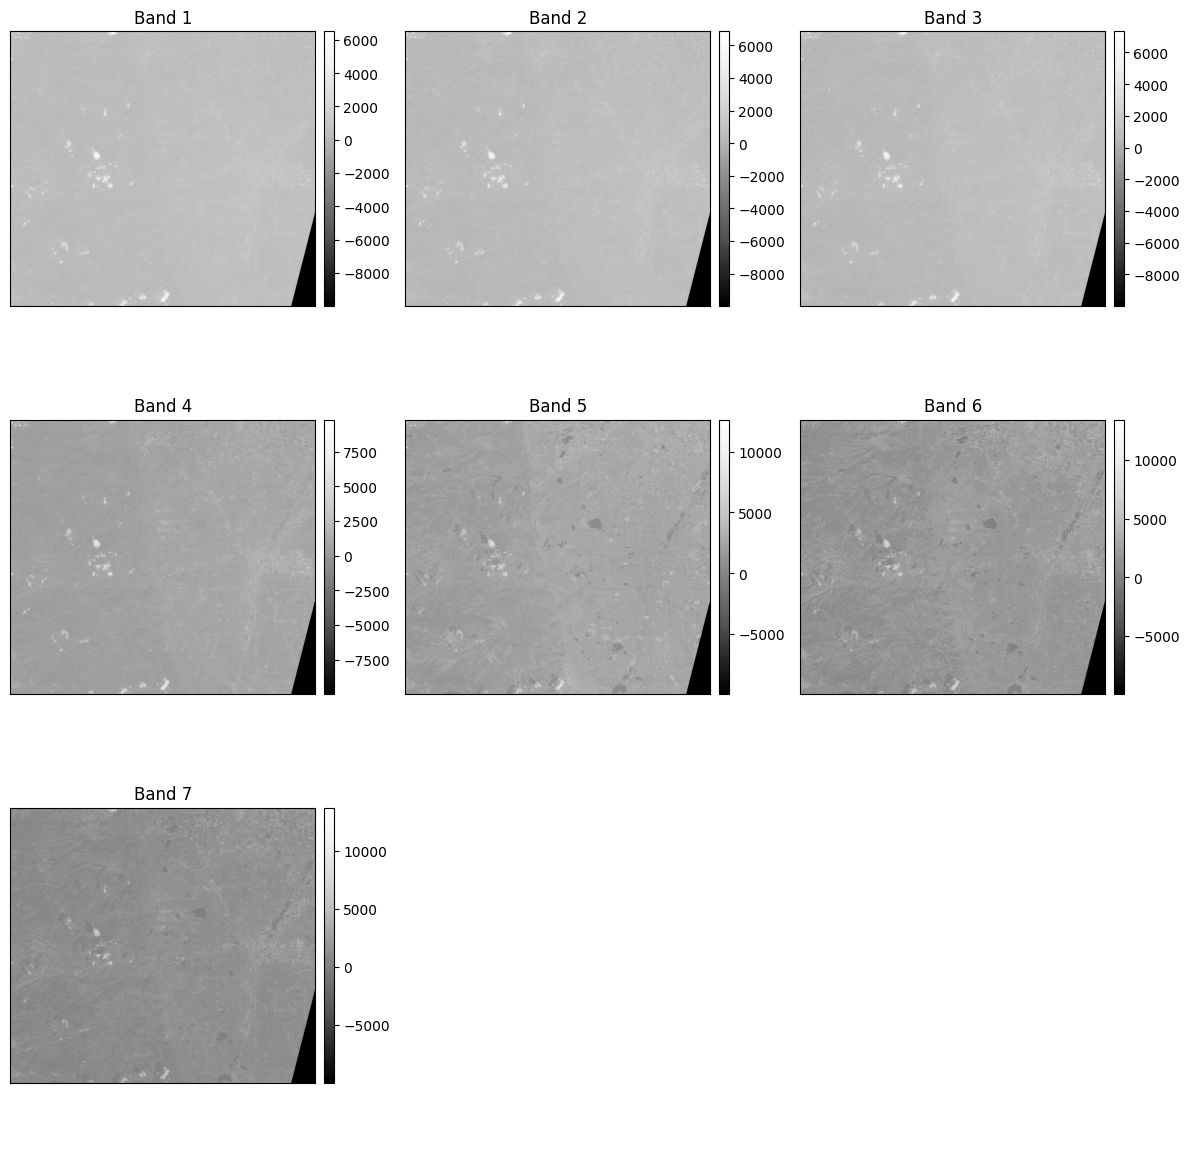

In [42]:
import earthpy.plot as epp
import matplotlib.pyplot as plt
epp.plot_bands(arr_st)
plt.show()

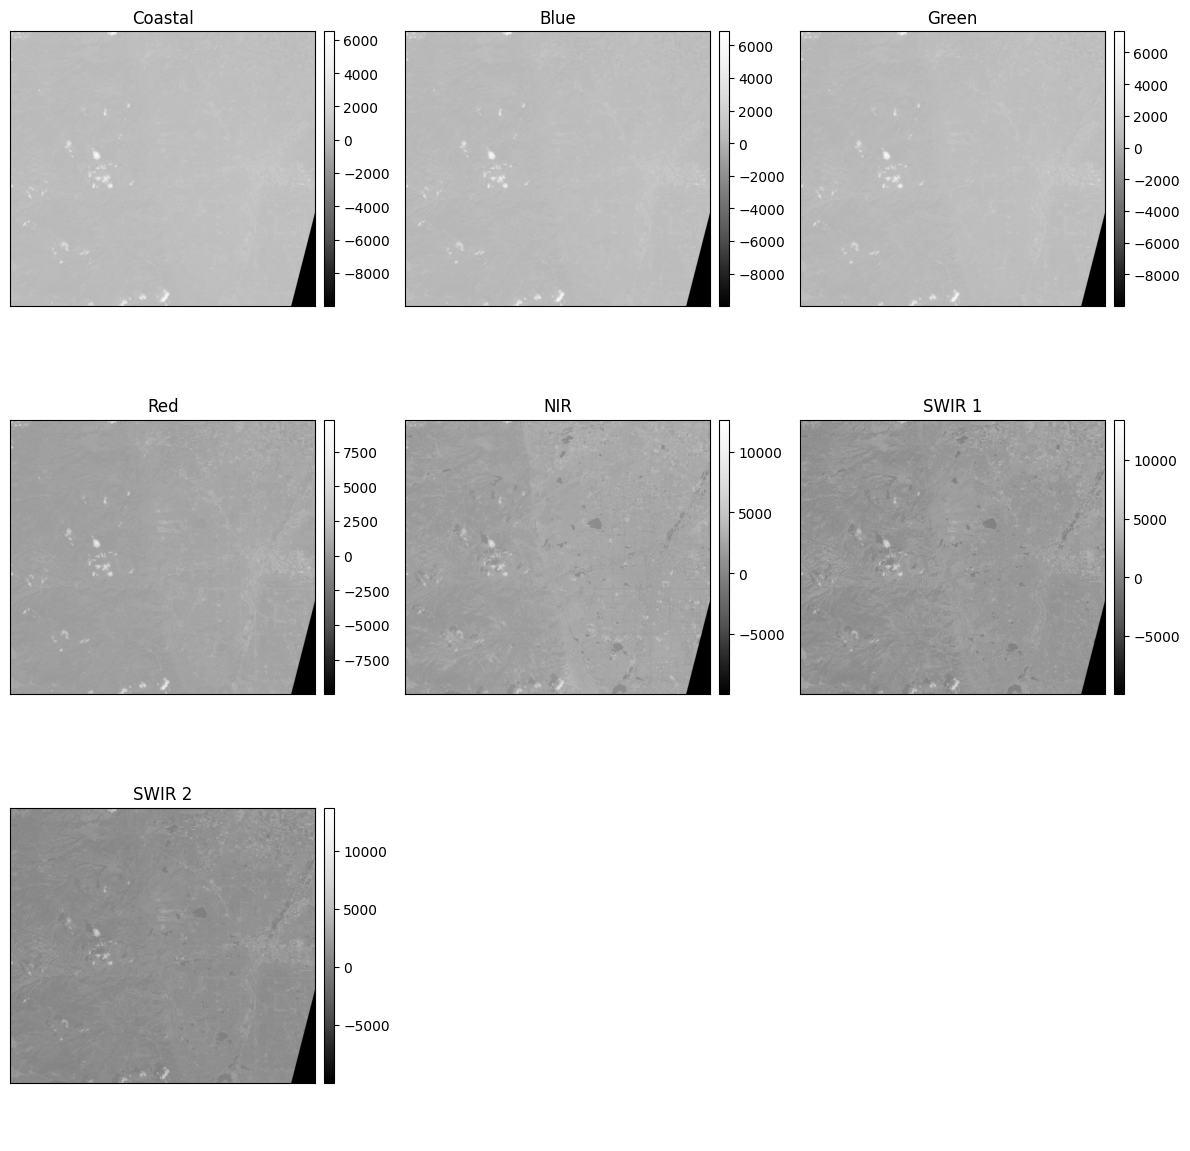

In [43]:
# S2.3: Plot raster bands using 'plot_bands()' function and add custom titles.
band_titles = ["Coastal", "Blue", "Green", "Red", "NIR", "SWIR 1", "SWIR 2"]

epp.plot_bands(arr_st, title = band_titles)
plt.show()

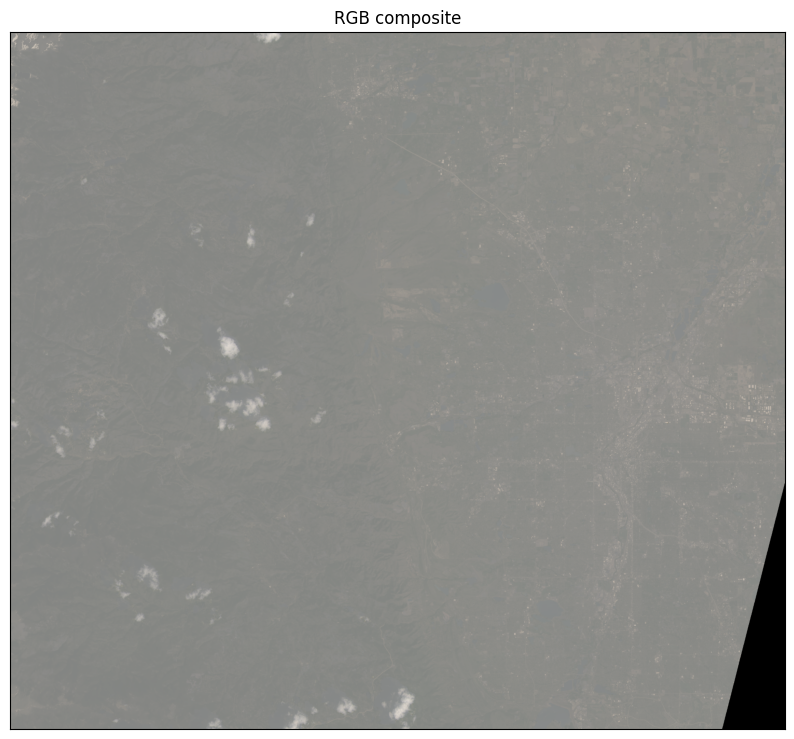

In [45]:
# S2.3: Plot raster bands using 'plot_bands()' function and add custom titles.
band_titles = ["Coastal", "Blue", "Green", "Red", "NIR", "SWIR 1", "SWIR 2"]

epp.plot_rgb(arr_st, rgb=(3,2,1), title = 'RGB composite')
plt.show()

The RGB composite image looks dark. A composite image may appear dark if the range of pixel brightness values is closer to 0.

To increase the brightness of the image, we can stretch the pixel brightness values to extend to the full 0-255 range of values as shown in the image below:

Thus, to increase the visual contrast, we will use stretch = True attribute inside the plot_rgb() function. Also, we can use str_clip attribute to specify how much of the tails of the data that we want to clip off. The larger the value of str_clip attribute, the more brightened the image would be.

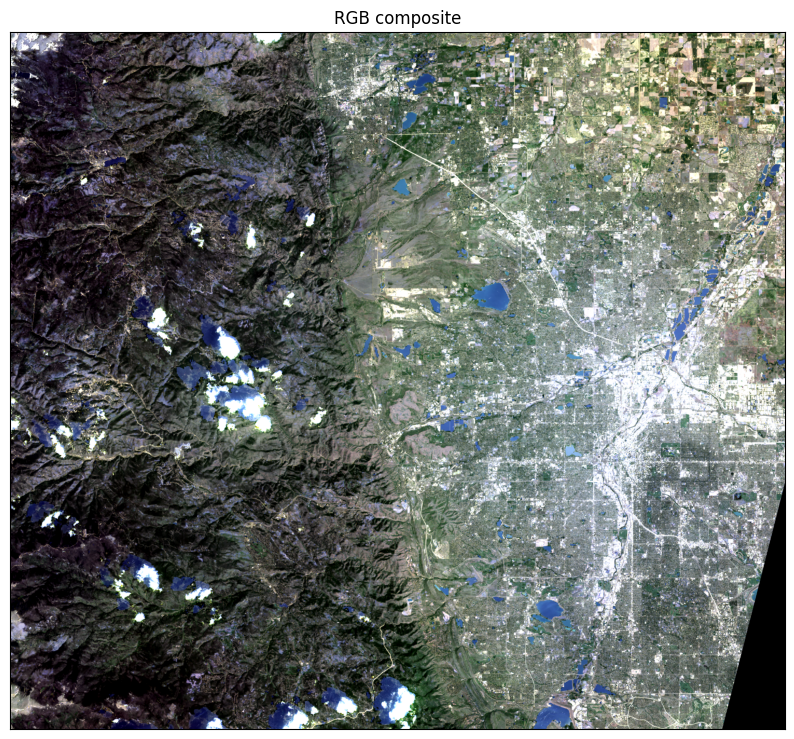

In [46]:
epp.plot_rgb(arr_st, rgb=(3,2,1), title = 'RGB composite', stretch=True, str_clip=4)
plt.show()

### Plotting NVDI
(Normalised Difference Vegetation Index)

In [47]:
ndvi=es.normalized_diff(arr_st[4], arr_st[3])
ndvi

array([[ 0.51188032,  0.4375    ,  0.31081081, ...,  0.35361391,
         0.36243936,  0.37589306],
       [ 0.48864642,  0.43411295,  0.31301157, ...,  0.34814815,
         0.34425473,  0.35117674],
       [ 0.49777382,  0.46113074,  0.36025382, ...,  0.3271719 ,
         0.32386624,  0.33363992],
       ...,
       [ 0.50896159,  0.49396205,  0.46626866, ..., -0.        ,
        -0.        , -0.        ],
       [ 0.47409689,  0.47032772,  0.44848859, ..., -0.        ,
        -0.        , -0.        ],
       [ 0.4452757 ,  0.474413  ,  0.32042649, ..., -0.        ,
        -0.        , -0.        ]])

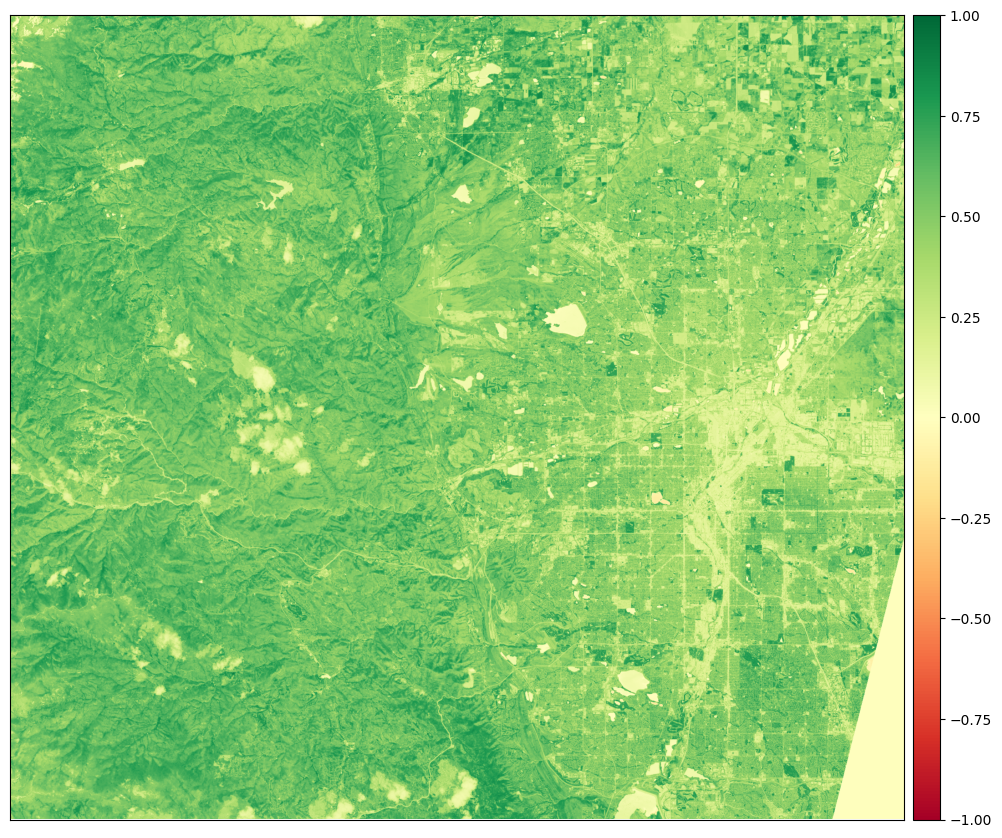

In [49]:
epp.plot_bands(ndvi, cmap='RdYlGn', vmin = -1, vmax = 1)
plt.show()

From the above image, you may observe that the area possess moderate to dense vegetation. The yellow area having NDVI nearly equal to 0 are barren land area.

## Hillshade effect

In [51]:
ep.data.get_data('vignette-elevation')

Extracted output to ./vignette-elevation/.


'./vignette-elevation/.'

In [52]:
import rasterio as rio
from rasterio.plot import show
import numpy as np

path = "/content/vignette-elevation/pre_DTM.tif"
with rio.open(path) as src:
    elevation_arr = src.read(1)
    # Setting masking values
    elevation_arr[elevation_arr < 0] = np.nan
elevation_arr

array([[      nan,       nan,       nan, ..., 1695.63  , 1695.4199,
        1695.4299],
       [      nan,       nan,       nan, ..., 1695.6   , 1695.5399,
        1695.36  ],
       [      nan,       nan,       nan, ..., 1695.38  , 1695.44  ,
        1695.37  ],
       ...,
       [      nan,       nan,       nan, ..., 1681.45  , 1681.39  ,
        1681.25  ],
       [      nan,       nan,       nan, ..., 1681.72  , 1681.57  ,
        1681.5599],
       [      nan,       nan,       nan, ..., 1681.89  , 1681.8099,
        1681.74  ]], dtype=float32)

Plotting the DEM (Digital Elevation Model) which is the bare earth topographic surface excluding trees, buildings and other surface objects.
It is a type of raster data that contains an elevation value for each cell.

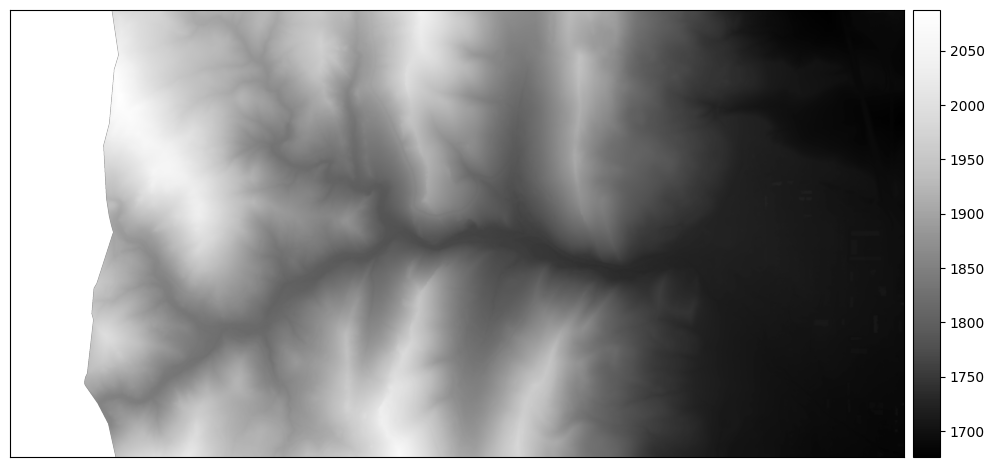

In [53]:
# Plotting DEM
epp.plot_bands(elevation_arr)
plt.show()

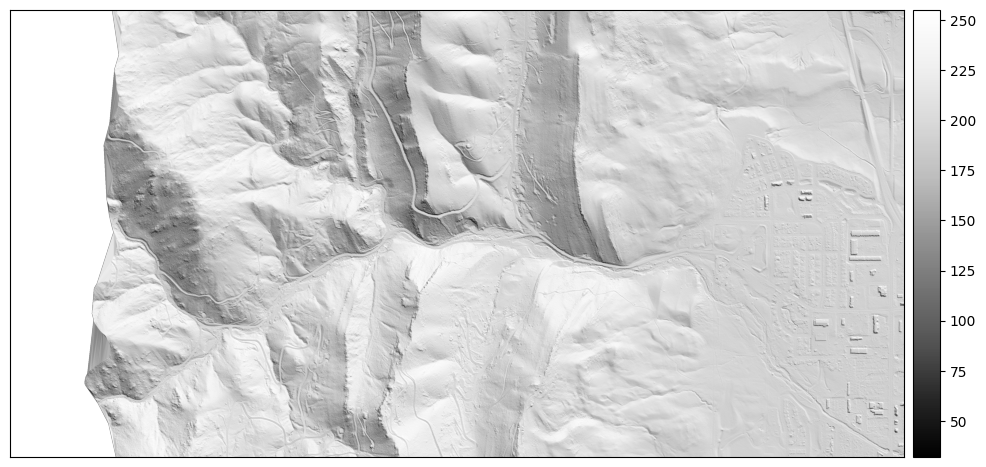

In [55]:
# Adding Hillshade
hillshade=es.hillshade(elevation_arr)
epp.plot_bands(hillshade)
plt.show()